# Decision Tree Prediction Model  using Google Analytics data from an ecommerce store.

## Problem Statement:
Build a decision tree prediction model to predict if the new visitor will transact or not.
When the new visitor visits the website, we get the information about source, medium, campaign,
deviceCategory, operatingSystem, city, channelGrouping, pageviews, timeOnSite, bounce, etc.

In [206]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
# load the dataset
df= pd.read_csv('Data1.csv')

c:\users\aj\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data Exploration

In [208]:
df.head()

,fullVisitorId,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
0,27376579751715,1,20170211,1486866293,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
1,39460501403861,1,20170327,1490629516,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social
2,40862739425590,1,20170211,1486836571,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
3,40862739425590,2,20170211,1486838824,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
4,62267706107999,1,20170709,1499645960,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates


In [209]:
df.shape

(464704, 17)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464704 entries, 0 to 464703
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   fullVisitorId                   464704 non-null  object 
 1   visitNumber                     464704 non-null  int64  
 2   date                            464704 non-null  int64  
 3   visitStartTime                  464704 non-null  int64  
 4   totals_bounces                  232372 non-null  float64
 5   totals_pageviews                464652 non-null  float64
 6   totals_timeOnSite               231683 non-null  float64
 7   totals_totalTransactionRevenue  6308 non-null    float64
 8   totals_transactions             6308 non-null    float64
 9   trafficSource_source            464704 non-null  object 
 10  trafficSource_medium            464704 non-null  object 
 11  trafficSource_campaign          464704 non-null  object 
 12  device_deviceCat

In [211]:
df.describe()

,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions
count,464704.000000,4.647040e+05,4.647040e+05,232372.0,464652.000000,231683.000000,6.308000e+03,6308.000000
mean,2.333767,2.017042e+07,1.492482e+09,1.0,3.770607,279.874622,1.617053e+08,1.046449
std,9.877242,2.006409e+02,5.279251e+06,0.0,6.402036,492.253792,9.034953e+08,0.531457
min,1.000000,2.017010e+07,1.483258e+09,1.0,1.000000,1.000000,2.200000e+06,1.000000
25%,1.000000,2.017022e+07,1.487894e+09,1.0,1.000000,33.000000,2.899000e+07,1.000000
50%,1.000000,2.017042e+07,1.492438e+09,1.0,1.000000,94.000000,5.297500e+07,1.000000
75%,1.000000,2.017061e+07,1.497071e+09,1.0,4.000000,290.000000,1.119375e+08,1.000000
max,395.000000,2.017073e+07,1.501571e+09,1.0,466.000000,12136.000000,4.708206e+10,25.000000


In [212]:
# We make a copy of the original dataset for our data analysis purpose, so that the original dataset remains unchanged if required.
df1 = df.copy()

In [213]:
df1.head()

,fullVisitorId,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
0,27376579751715,1,20170211,1486866293,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
1,39460501403861,1,20170327,1490629516,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social
2,40862739425590,1,20170211,1486836571,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
3,40862739425590,2,20170211,1486838824,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
4,62267706107999,1,20170709,1499645960,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates


## Data Cleaning

We will load in the data, check for cleanliness, and then trim and clean our datasets for analysis in this section.

We get a list of the column names and their data types.

In [214]:
list(df.columns.values)

['fullVisitorId',
 'visitNumber',
 'date',
 'visitStartTime',
 'totals_bounces',
 'totals_pageviews',
 'totals_timeOnSite',
 'totals_totalTransactionRevenue',
 'totals_transactions',
 'trafficSource_source',
 'trafficSource_medium',
 'trafficSource_campaign',
 'device_deviceCategory',
 'device_operatingSystem',
 'device_mobileDeviceModel',
 'geoNetwork_city',
 'channelGrouping']

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464704 entries, 0 to 464703
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   fullVisitorId                   464704 non-null  object 
 1   visitNumber                     464704 non-null  int64  
 2   date                            464704 non-null  int64  
 3   visitStartTime                  464704 non-null  int64  
 4   totals_bounces                  232372 non-null  float64
 5   totals_pageviews                464652 non-null  float64
 6   totals_timeOnSite               231683 non-null  float64
 7   totals_totalTransactionRevenue  6308 non-null    float64
 8   totals_transactions             6308 non-null    float64
 9   trafficSource_source            464704 non-null  object 
 10  trafficSource_medium            464704 non-null  object 
 11  trafficSource_campaign          464704 non-null  object 
 12  device_deviceCat

#### We now check and address each of these columns one by one.

<b> Column 1: fullVisitorId -This is a unique identifier for each user of Google Merchandise Store. 
We can assume that the visitor ID information does not impact the transactions, and hence this column can be dropped.</b>

In [216]:
df1 = df1.drop('fullVisitorId', axis=1)
df1.head()

,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
0,1,20170211,1486866293,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
1,1,20170327,1490629516,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social
2,1,20170211,1486836571,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
3,2,20170211,1486838824,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
4,1,20170709,1499645960,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates


#### Column 2: visitNumber -The session(visit) number for this user. If this is the first session, then this is set to 1. No change is required for this column in the dataset

In [217]:
df1['visitNumber'].value_counts()

1      353469
2       51820
3       19768
4       10577
5        6419
        ...  
357         1
177         1
176         1
174         1
353         1
Name: visitNumber, Length: 383, dtype: int64

#### Column 3: date- The date of the session in YYYYMMDD format. The date info again is repeated in the next column (timestamp), hence the date info is duplicated and this column can be dropped. We will extract and analyse date info in the next column.

In [218]:
df1 = df1.drop('date', axis=1)
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
0,1,1486866293,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
1,1,1490629516,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social
2,1,1486836571,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
3,2,1486838824,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
4,1,1499645960,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates


#### Column 4: visitStartTime - The timestamp (expressed as POSIX time). We extract Time from visitStartTime timestamp

In [219]:
from datetime import datetime
df1['visitStartTime']=pd.to_datetime(df1['visitStartTime'],unit='s')
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
0,1,2017-02-12 02:24:53,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
1,1,2017-03-27 15:45:16,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social
2,1,2017-02-11 18:09:31,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
3,2,2017-02-11 18:47:04,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
4,1,2017-07-10 00:19:20,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates


In [220]:
#Getting year, month and day from date
df1['year']=df1['visitStartTime'].dt.year
df1['month']=df1['visitStartTime'].dt.month
df1['day']=df1['visitStartTime'].dt.day
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping,year,month,day
0,1,2017-02-12 02:24:53,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,2017,2,12
1,1,2017-03-27 15:45:16,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social,2017,3,27
2,1,2017-02-11 18:09:31,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11
3,2,2017-02-11 18:47:04,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11
4,1,2017-07-10 00:19:20,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates,2017,7,10


In [221]:
#Getting hour and minute from visitStartTime
df1['hour']=df1['visitStartTime'].dt.hour
df1['minute']=df1['visitStartTime'].dt.minute
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping,year,month,day,hour,minute
0,1,2017-02-12 02:24:53,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,2017,2,12,2,24
1,1,2017-03-27 15:45:16,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social,2017,3,27,15,45
2,1,2017-02-11 18:09:31,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,9
3,2,2017-02-11 18:47:04,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,47
4,1,2017-07-10 00:19:20,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates,2017,7,10,0,19


#### Column 5: totals_bounces - For a bounced session, the value is 1, otherwise it is null.
#### In practical situation, if a user has bounced off (total_bounces =1) there will be no transaction. Hence when total_bounce = 0 or NA will be accounted into those with successful transactions. We replace all NaN values in this column with 0.

In [222]:
df1['totals_bounces'].value_counts()

1.0    232372
Name: totals_bounces, dtype: int64

In [223]:
df1['totals_bounces'].fillna(0,inplace=True)
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping,year,month,day,hour,minute
0,1,2017-02-12 02:24:53,0.0,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,2017,2,12,2,24
1,1,2017-03-27 15:45:16,0.0,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social,2017,3,27,15,45
2,1,2017-02-11 18:09:31,0.0,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,9
3,2,2017-02-11 18:47:04,0.0,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,47
4,1,2017-07-10 00:19:20,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates,2017,7,10,0,19


#### Column 6: totals_pageviews-Total number of pageviews within the session.
#### In practical situation, if a user has no page views,there will be no transaction. Hence we replace the NaN values in this column with 0.

In [224]:
df1['totals_pageviews'].fillna(0,inplace=True)
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping,year,month,day,hour,minute
0,1,2017-02-12 02:24:53,0.0,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,2017,2,12,2,24
1,1,2017-03-27 15:45:16,0.0,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social,2017,3,27,15,45
2,1,2017-02-11 18:09:31,0.0,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,9
3,2,2017-02-11 18:47:04,0.0,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,47
4,1,2017-07-10 00:19:20,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates,2017,7,10,0,19


#### Column 7: totals_timeOnSite  -Total time of the session expressed in seconds. 
#### In practical situation, if a user has no total time on site,there will be no transaction. Hence we replace the NaN values in this column with 0

In [225]:
df1['totals_timeOnSite'].fillna(0,inplace=True)
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping,year,month,day,hour,minute
0,1,2017-02-12 02:24:53,0.0,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,2017,2,12,2,24
1,1,2017-03-27 15:45:16,0.0,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social,2017,3,27,15,45
2,1,2017-02-11 18:09:31,0.0,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,9
3,2,2017-02-11 18:47:04,0.0,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,47
4,1,2017-07-10 00:19:20,1.0,1.0,0.0,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates,2017,7,10,0,19


#### Column 8: totals_totalTransactionRevenue- Total transaction revenue, expressed as the value passed to Analytics multiplied by 10^6. 
#### Here we note that 'totals_totalTransactionRevenue' and 'totals_transactions' are related columns. If 'totals_transactions' has null value, then the corresponding  'totals_totalTransactionRevenue' column should also have a null value, and vice-versa.


#### We therefore check these two columns for the following conditions:

1. If there are any 'totals_transactions' null values where the corresponding  'totals_totalTransactionRevenue' value is not null.

2. If there are any 'totals_totalTransactionRevenue' null values where the corresponding  'totals_transactions' value is not null.

In [226]:
df1['diff'] = df.totals_totalTransactionRevenue.eq(pd.to_numeric(df.totals_transactions, errors='coerce'))

In [227]:
df1['diff'].value_counts()

False    464704
Name: diff, dtype: int64

#### In practical situation, if a user has no transaction revenue, there will be no transaction. We replace all NaN values in this column with 0

In [228]:
df1['totals_totalTransactionRevenue'].value_counts()

23990000.0     49
22990000.0     48
25990000.0     46
21990000.0     44
24990000.0     41
               ..
48680000.0      1
917500000.0     1
51070000.0      1
770340000.0     1
58940000.0      1
Name: totals_totalTransactionRevenue, Length: 3695, dtype: int64

In [229]:
df1['totals_totalTransactionRevenue'].fillna(0,inplace=True)
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,...,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping,year,month,day,hour,minute,diff
0,1,2017-02-12 02:24:53,0.0,5.0,49.0,0.0,NaN,(direct),(none),(not set),...,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,2017,2,12,2,24,False
1,1,2017-03-27 15:45:16,0.0,2.0,99.0,0.0,NaN,youtube.com,referral,(not set),...,Windows,not available in demo dataset,not available in demo dataset,Social,2017,3,27,15,45,False
2,1,2017-02-11 18:09:31,0.0,2.0,14.0,0.0,NaN,(direct),(none),(not set),...,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,9,False
3,2,2017-02-11 18:47:04,0.0,3.0,35.0,0.0,NaN,(direct),(none),(not set),...,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,47,False
4,1,2017-07-10 00:19:20,1.0,1.0,0.0,0.0,NaN,Partners,affiliate,Data Share Promo,...,Windows,not available in demo dataset,not available in demo dataset,Affiliates,2017,7,10,0,19,False


#### Column 9: totals_transactions: Total number of ecommerce transactions within the session. 
#### The missing values for totals_transactions in our dataset which we can consider as 0 (no transaction), hence we replace all NaN values in this column with 0 .

In [230]:
df1['totals_transactions'].fillna(0,inplace=True)
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,...,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping,year,month,day,hour,minute,diff
0,1,2017-02-12 02:24:53,0.0,5.0,49.0,0.0,0.0,(direct),(none),(not set),...,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,2017,2,12,2,24,False
1,1,2017-03-27 15:45:16,0.0,2.0,99.0,0.0,0.0,youtube.com,referral,(not set),...,Windows,not available in demo dataset,not available in demo dataset,Social,2017,3,27,15,45,False
2,1,2017-02-11 18:09:31,0.0,2.0,14.0,0.0,0.0,(direct),(none),(not set),...,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,9,False
3,2,2017-02-11 18:47:04,0.0,3.0,35.0,0.0,0.0,(direct),(none),(not set),...,Macintosh,not available in demo dataset,Oakland,Paid Search,2017,2,11,18,47,False
4,1,2017-07-10 00:19:20,1.0,1.0,0.0,0.0,0.0,Partners,affiliate,Data Share Promo,...,Windows,not available in demo dataset,not available in demo dataset,Affiliates,2017,7,10,0,19,False


#### Column 10- trafficSource_source: The source of the traffic source. Could be the name of the search engine, the referring hostname, or a value of the utm_source URL parameter.

In [231]:
df1['trafficSource_source'].value_counts()

(direct)                      187281
google                        179804
youtube.com                    50211
analytics.google.com           10859
Partners                        9716
                               ...  
good.barkpost.com                  1
int.search.mywebsearch.com         1
basecamp.com                       1
ad.doubleclick.net                 1
computerworld.com                  1
Name: trafficSource_source, Length: 223, dtype: int64

#### Column 11 - trafficSource_medium: The medium of the traffic source. Could be "organic", "cpc", "referral", or the value of the utm_medium URL parameter.

In [232]:
df1['trafficSource_medium'].value_counts()

(none)       187279
organic      173418
referral      81710
affiliate      9709
cpc            9265
cpm            3211
(not set)       112
Name: trafficSource_medium, dtype: int64

#### Column 12- trafficSource_campaign: The campaign value. Usually set by the utm_campaign URL parameter

In [233]:
df1['trafficSource_campaign'].value_counts()

(not set)                             446593
Data Share Promo                        9709
AW - Accessories                        5318
AW - Dynamic Search Ads Whole Site      3048
AW - Apparel                              32
AW - Electronics                           3
Data Share                                 1
Name: trafficSource_campaign, dtype: int64

#### Column 13-device_deviceCategory: The type of device (Mobile, Tablet, Desktop).

In [234]:
df1['device_deviceCategory'].value_counts()

desktop    312965
mobile     133307
tablet      18432
Name: device_deviceCategory, dtype: int64

#### Column 14- device_operatingSystem: The operating system of the device (e.g., "Macintosh" or "Windows").

In [235]:
df1['device_operatingSystem'].value_counts()

Windows          171261
Macintosh        107310
Android           78294
iOS               69145
Linux             19347
Chrome OS         15482
(not set)          2798
Windows Phone       624
Samsung             186
BlackBerry          112
Nintendo WiiU        35
Xbox                 34
Nintendo Wii         33
Firefox OS           32
FreeBSD               7
OpenBSD               2
Nintendo 3DS          1
NTT DoCoMo            1
Name: device_operatingSystem, dtype: int64

#### Column 15- device_mobileDeviceModel: The mobile device model.

In [236]:
df1['device_mobileDeviceModel'].value_counts()

not available in demo dataset    464704
Name: device_mobileDeviceModel, dtype: int64

In [237]:
# All the values in this column are not available, hence we can drop this column from our dataset.
df1 = df1.drop('device_mobileDeviceModel', axis=1)
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,geoNetwork_city,channelGrouping,year,month,day,hour,minute,diff
0,1,2017-02-12 02:24:53,0.0,5.0,49.0,0.0,0.0,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Organic Search,2017,2,12,2,24,False
1,1,2017-03-27 15:45:16,0.0,2.0,99.0,0.0,0.0,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,Social,2017,3,27,15,45,False
2,1,2017-02-11 18:09:31,0.0,2.0,14.0,0.0,0.0,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2017,2,11,18,9,False
3,2,2017-02-11 18:47:04,0.0,3.0,35.0,0.0,0.0,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2017,2,11,18,47,False
4,1,2017-07-10 00:19:20,1.0,1.0,0.0,0.0,0.0,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,Affiliates,2017,7,10,0,19,False


#### Column 16 - geoNetwork_city: Users' city, derived from their IP addresses or Geographical IDs.

In [238]:
df1['geoNetwork_city'].value_counts()

not available in demo dataset    268369
Mountain View                     21564
(not set)                         16321
New York                          14588
San Francisco                     11456
                                  ...  
Bothell                               5
Bozeman                               3
Pryor                                 3
Saratoga                              3
Boise                                 3
Name: geoNetwork_city, Length: 436, dtype: int64

In [239]:
# format and replace the values
df1['geoNetwork_city'].replace('not available in demo dataset', 'NotKnown',inplace=True)
df1['geoNetwork_city'].replace('(not set)', 'NotKnown',inplace=True)
df1.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,geoNetwork_city,channelGrouping,year,month,day,hour,minute,diff
0,1,2017-02-12 02:24:53,0.0,5.0,49.0,0.0,0.0,(direct),(none),(not set),desktop,Macintosh,NotKnown,Organic Search,2017,2,12,2,24,False
1,1,2017-03-27 15:45:16,0.0,2.0,99.0,0.0,0.0,youtube.com,referral,(not set),desktop,Windows,NotKnown,Social,2017,3,27,15,45,False
2,1,2017-02-11 18:09:31,0.0,2.0,14.0,0.0,0.0,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2017,2,11,18,9,False
3,2,2017-02-11 18:47:04,0.0,3.0,35.0,0.0,0.0,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2017,2,11,18,47,False
4,1,2017-07-10 00:19:20,1.0,1.0,0.0,0.0,0.0,Partners,affiliate,Data Share Promo,desktop,Windows,NotKnown,Affiliates,2017,7,10,0,19,False


#### Column 17: ChannelGrouping: The Default Channel Group associated with an end user's session for this View

In [240]:
df1['channelGrouping'].value_counts()

Organic Search    233089
Direct             86029
Social             59923
Referral           58395
Paid Search        14180
Affiliates          9709
Display             3265
(Other)              114
Name: channelGrouping, dtype: int64

In [241]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464704 entries, 0 to 464703
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   visitNumber                     464704 non-null  int64         
 1   visitStartTime                  464704 non-null  datetime64[ns]
 2   totals_bounces                  464704 non-null  float64       
 3   totals_pageviews                464704 non-null  float64       
 4   totals_timeOnSite               464704 non-null  float64       
 5   totals_totalTransactionRevenue  464704 non-null  float64       
 6   totals_transactions             464704 non-null  float64       
 7   trafficSource_source            464704 non-null  object        
 8   trafficSource_medium            464704 non-null  object        
 9   trafficSource_campaign          464704 non-null  object        
 10  device_deviceCategory           464704 non-null  object 

#### Our Problem Statement is to predict if the new visitor will transact or not. We therefore create a new target variable column- 'transact', which takes the value 1 for a transaction and 0 for no transaction.

In [242]:
df1['transact'] = np.where(df['totals_transactions']  == 0, '0','1')
df1['transact'] = df1['transact'].astype('str')

In [243]:
#totals_totalTransactionRevenue- Total transaction revenue is expressed as the value passed to Analytics multiplied by 10^6
# Therefore , the TransactionRevenue is obtained as totals_totalTransactionRevenue/ 1000000

df1['TransactionRevenue'] = df1['totals_totalTransactionRevenue'] / 1000000

## Exploratory Data Analysis 

**We perform EDA using the clean dataset:**

In [244]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464704 entries, 0 to 464703
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   visitNumber                     464704 non-null  int64         
 1   visitStartTime                  464704 non-null  datetime64[ns]
 2   totals_bounces                  464704 non-null  float64       
 3   totals_pageviews                464704 non-null  float64       
 4   totals_timeOnSite               464704 non-null  float64       
 5   totals_totalTransactionRevenue  464704 non-null  float64       
 6   totals_transactions             464704 non-null  float64       
 7   trafficSource_source            464704 non-null  object        
 8   trafficSource_medium            464704 non-null  object        
 9   trafficSource_campaign          464704 non-null  object        
 10  device_deviceCategory           464704 non-null  object 

**We further drop the following columns from the dataset as these are no longer required:**

 **visitStartTime** - as we have already extracted the required year/ month/ day/hour/ minute info from this column

 **totals_totalTransactionRevenue** - as we have obtained the required TransactionRevenue column from this.

 **year** - the info is not required as the year is 2017 and is same for all records

 **diff** - information column already used earlier for comparison and not required for transactional analysis.

In [245]:
df1 = df1.drop(['visitStartTime','totals_totalTransactionRevenue','year','diff'],axis=1)

In [246]:
df1.head()

,visitNumber,totals_bounces,totals_pageviews,totals_timeOnSite,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,geoNetwork_city,channelGrouping,month,day,hour,minute,transact,TransactionRevenue
0,1,0.0,5.0,49.0,0.0,(direct),(none),(not set),desktop,Macintosh,NotKnown,Organic Search,2,12,2,24,1,0.0
1,1,0.0,2.0,99.0,0.0,youtube.com,referral,(not set),desktop,Windows,NotKnown,Social,3,27,15,45,1,0.0
2,1,0.0,2.0,14.0,0.0,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2,11,18,9,1,0.0
3,2,0.0,3.0,35.0,0.0,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2,11,18,47,1,0.0
4,1,1.0,1.0,0.0,0.0,Partners,affiliate,Data Share Promo,desktop,Windows,NotKnown,Affiliates,7,10,0,19,1,0.0


In [247]:
df1.describe()

,visitNumber,totals_bounces,totals_pageviews,totals_timeOnSite,totals_transactions,month,day,hour,minute,TransactionRevenue
count,464704.000000,464704.000000,464704.000000,464704.000000,464704.000000,464704.000000,464704.000000,464704.000000,464704.000000,464704.000000
mean,2.333767,0.500043,3.770185,139.534396,0.014205,4.050566,15.760374,12.663859,29.541590,2.195026
std,9.877242,0.500001,6.401802,374.686704,0.136001,2.006291,8.797903,6.852505,17.282601,106.906946
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,8.000000,7.000000,15.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,16.000000,14.000000,30.000000,0.000000
75%,1.000000,1.000000,4.000000,94.000000,0.000000,6.000000,23.000000,18.000000,45.000000,0.000000
max,395.000000,1.000000,466.000000,12136.000000,25.000000,8.000000,31.000000,23.000000,59.000000,47082.060000


### We make the following observations from the statistical summary and the dataset.

**1. Visit Number** :We observe that the mean number of visits for an user is 2. Around 75% of users have visited only once. There are a number of outliers with values > 300, with the maximum value being 395.We plot this info in a boxplot.

In [248]:
df1['visitNumber'].value_counts()

1      353469
2       51820
3       19768
4       10577
5        6419
        ...  
357         1
177         1
176         1
174         1
353         1
Name: visitNumber, Length: 383, dtype: int64

c:\users\aj\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


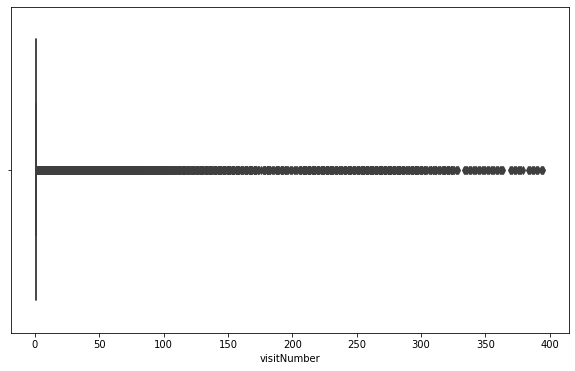

In [249]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.boxplot(df1['visitNumber']);

**2. Total bounces:** We observe that around 50% of visits are bounces.

In [250]:
df1['totals_bounces'].value_counts()

1.0    232372
0.0    232332
Name: totals_bounces, dtype: int64

**3. Total page views:** The mean number of total page views is near to 4; around 75% of page views are close to 4. The outlier is a maximum value of 466 page views. We plot the number of transactions against page views.

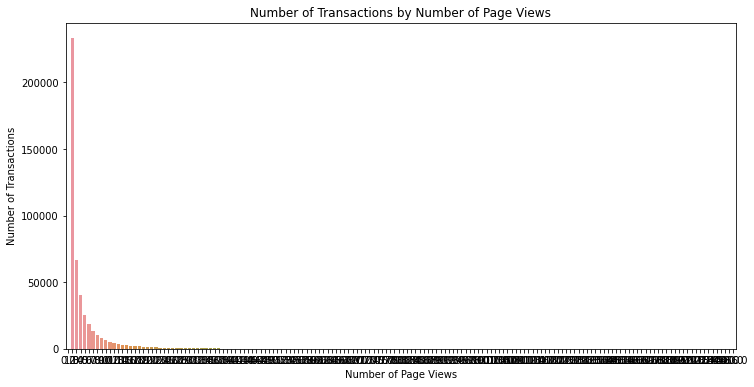

In [251]:
plt.figure(figsize=(12,6))
sns.countplot(x='totals_pageviews', data=df1)
plt.xlabel('Number of Page Views')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Number of Page Views');

**4. Total time on site:** The average time spent by an user on the site is 139 seconds. The minimum time is 0 (for bounces), also there are some outliers with maximum values upto 12136 seconds.

**5.Total Transaction:** The average number of transactions per visit is quite low at 0.014205. More than 75% of visits do not result in any transaction. There are some outliers, where the maximum number of transactions per visit reaches 25.

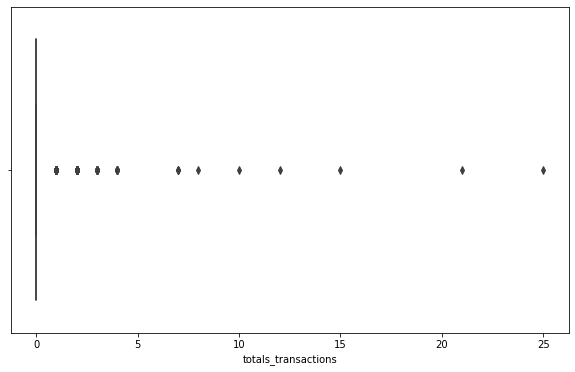

In [252]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.boxplot(x=df1['totals_transactions']);

**6. Transaction Revenue:** This field appears to be highly skewed. The average revenue per transaction is 2 currency units, however there is an extremely large value outlier as the maximum is 47082. The large outlier value is likely to have impacted the mean value.

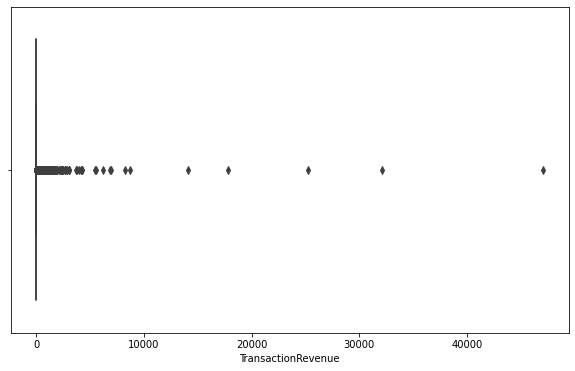

In [253]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.boxplot(x=df1['TransactionRevenue']);

**7.Transact value**: The target variable is checked. We observe that 6308 visits have reulted in a transaction, whereas the remaining 458396 visits have yielded no transaction

In [254]:
df1['transact'].value_counts()

1    464704
Name: transact, dtype: int64

**8. Transactions by month,date,hour**

In [255]:
base_colour = sns.color_palette()[0]

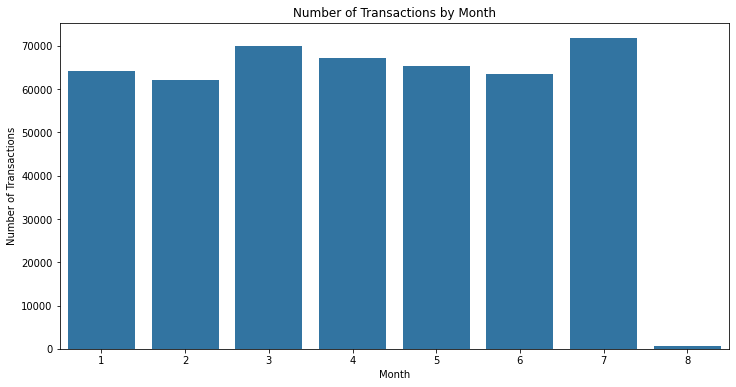

In [256]:
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=df1, color=base_colour)
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Month");

Observation: The number of transactions does not vary much by month, it remains uniformly distributed throughout the year.

In [257]:
plt.figure(figsize=(12,6))
sns.countplot(x='day', data=df, color=base_colour)
plt.xlabel("day")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Day");

ValueError: Could not interpret input 'day'

<Figure size 864x432 with 0 Axes>

Observation: The number of transactions remains uniformly throughout the month, but decreases at the end of the month.

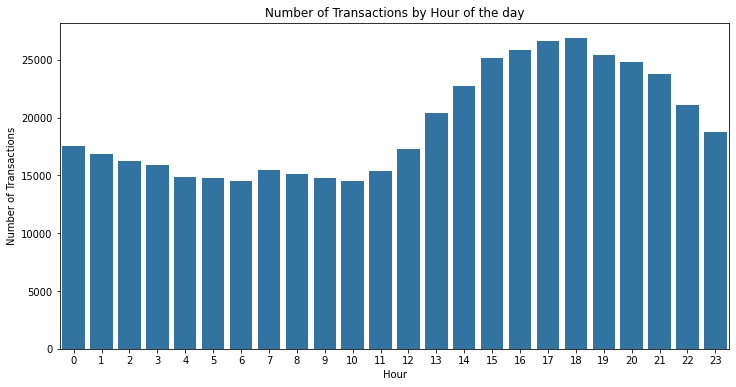

In [258]:
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=df1, color=base_colour)
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Hour of the day");

Observation: The number of transactions remains less and approximately uniform in the morning hours, and starts increasing from around noon. It reaches a peak in the evening between 5-6 pm, and then starts decreasing again during late evening hours.

**9. Transactions by device category, device_operatingSystem, channelGrouping, medium**

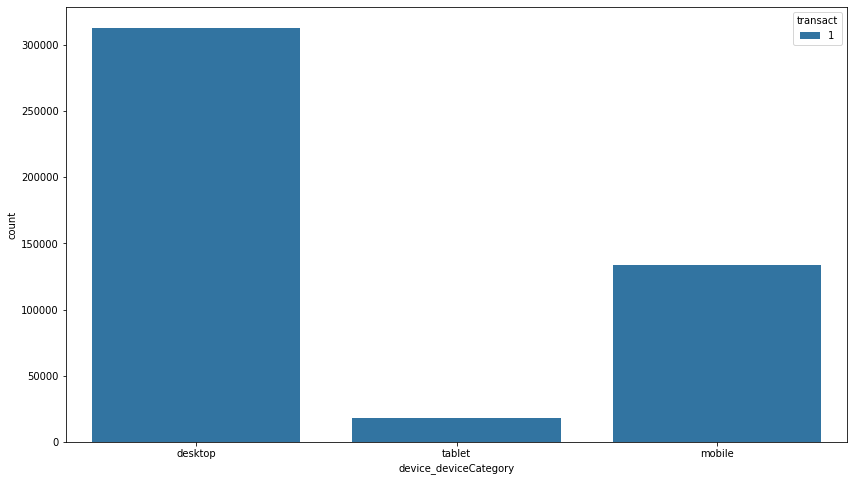

In [259]:
plt.figure(figsize=(14,8))
sns.countplot(x='device_deviceCategory', hue = 'transact', data=df1);

Observation: Maximum number of transactions originate from desktop, and least from tablets.

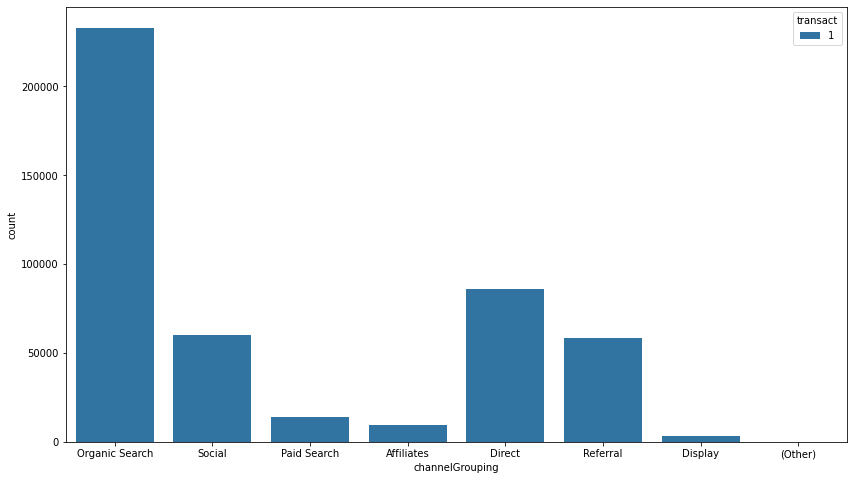

In [260]:
plt.figure(figsize=(14,8))
sns.countplot(x='channelGrouping', hue = 'transact', data=df1);

Observation: Organic search, direct, social and referral lead to maximum transactions.

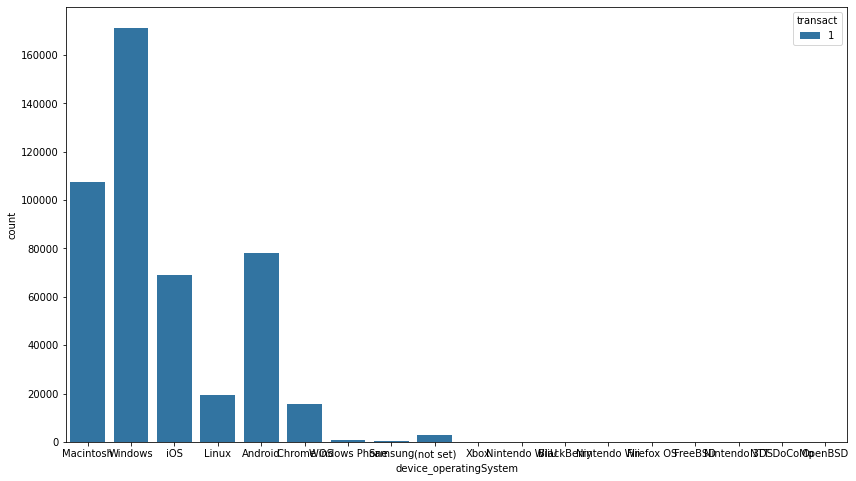

In [261]:
plt.figure(figsize=(14,8))
sns.countplot(x='device_operatingSystem', hue = 'transact', data=df1);

Observation: Macintosh and windows users have a higher transaction.

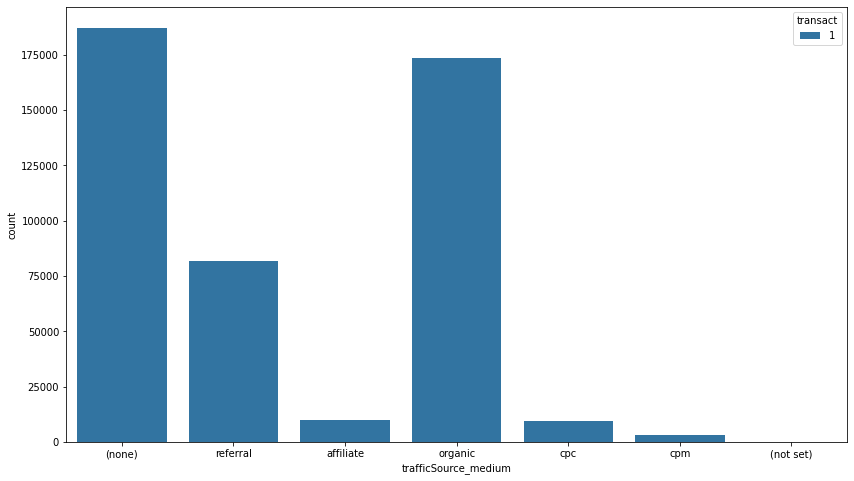

In [262]:
plt.figure(figsize=(14,8))
sns.countplot(x='trafficSource_medium', hue = 'transact', data=df1);

Observation: Organic and (none) are the higher conversion mediums.

**10. Correlation Matrix showing relationship between all the features**

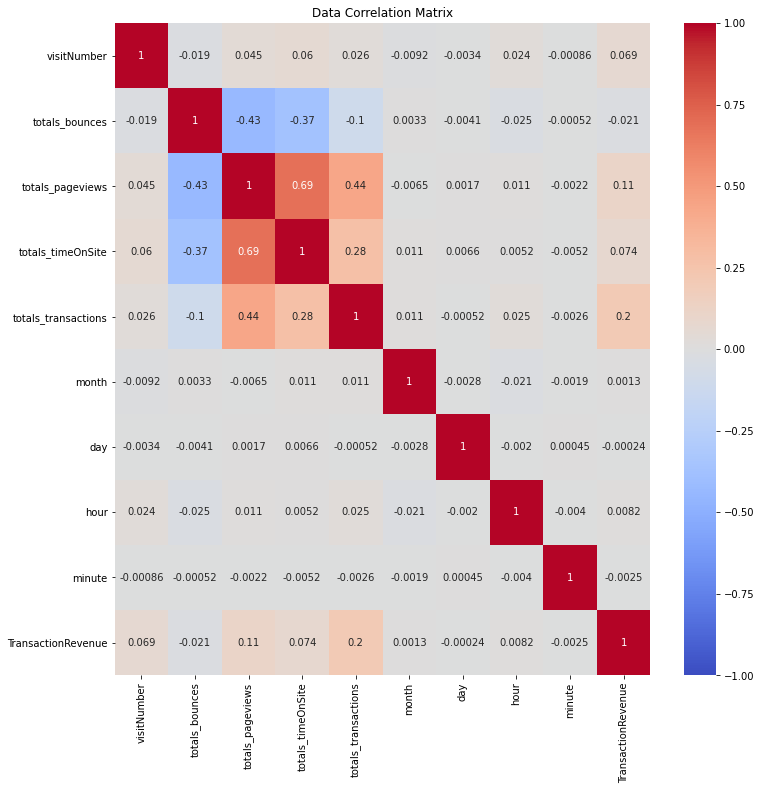

In [263]:
fig1 = plt.figure(figsize=(12,12));
df.corr()
plt.title('Data Correlation Matrix')
sns.heatmap(df1.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True);

In [264]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464704 entries, 0 to 464703
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   visitNumber             464704 non-null  int64  
 1   totals_bounces          464704 non-null  float64
 2   totals_pageviews        464704 non-null  float64
 3   totals_timeOnSite       464704 non-null  float64
 4   totals_transactions     464704 non-null  float64
 5   trafficSource_source    464704 non-null  object 
 6   trafficSource_medium    464704 non-null  object 
 7   trafficSource_campaign  464704 non-null  object 
 8   device_deviceCategory   464704 non-null  object 
 9   device_operatingSystem  464704 non-null  object 
 10  geoNetwork_city         464704 non-null  object 
 11  channelGrouping         464704 non-null  object 
 12  month                   464704 non-null  int64  
 13  day                     464704 non-null  int64  
 14  hour                

### In the Pandas dataframe, we encode all the data which are categorized to dtype:object. We categorize the object features in two different groups. The group having many categorical values will be used for Label Encoding and the other having only a few categorical values will be used for One Hot Encoding.

In [265]:
cat_many_label_cols = ["channelGrouping","geoNetwork_city","device_operatingSystem", "trafficSource_campaign","trafficSource_medium", "trafficSource_source"]
cat_few_label_cols = ["device_deviceCategory"]

In [269]:
# Perform Label Encoding and One Hot Encoding for the above grouped features.
from sklearn import preprocessing
for col in cat_many_label_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df1[col].values.astype('str')))
    df1[col] = lbl.transform(list(df1[col].values.astype('str')))
    
df1 = pd.get_dummies(df1,columns=cat_few_label_cols)

channelGrouping
geoNetwork_city
device_operatingSystem
trafficSource_campaign
trafficSource_medium
trafficSource_source


In [270]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464704 entries, 0 to 464703
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   visitNumber                    464704 non-null  int64  
 1   totals_bounces                 464704 non-null  float64
 2   totals_pageviews               464704 non-null  float64
 3   totals_timeOnSite              464704 non-null  float64
 4   totals_transactions            464704 non-null  float64
 5   trafficSource_source           464704 non-null  int32  
 6   trafficSource_medium           464704 non-null  int32  
 7   trafficSource_campaign         464704 non-null  int32  
 8   device_operatingSystem         464704 non-null  int32  
 9   geoNetwork_city                464704 non-null  int32  
 10  channelGrouping                464704 non-null  int32  
 11  month                          464704 non-null  int64  
 12  day                           

## Split dataset into features and target variable

In [271]:
feature_cols = ['visitNumber',
 'totals_bounces',
 'totals_pageviews',
 'totals_timeOnSite',
 'trafficSource_source',
 'trafficSource_medium',
 'trafficSource_campaign',
 'device_operatingSystem',
 'geoNetwork_city',
 'channelGrouping',
 'month',
 'day',
 'hour',              
 'device_deviceCategory_desktop',
 'device_deviceCategory_mobile']

X = df1[feature_cols] # Features

y = df1.transact # Target variable

In [272]:
X.shape

(464704, 15)

In [273]:
y.shape

(464704,)

## Split dataset into Test and Train sets

In [274]:
# Split the dataset into training set and test set. We put puts 70% of the data into a training set and 30% of the data into a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Building Decision Tree Model

In [275]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [276]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating the Decision Tree Model

In [277]:
#Evaluating Model- check how accurately the classifier or model can predict the type of cultivars.
#Accuracy can be computed by comparing actual test set values and predicted values.
# we are going to use accuracy as our metric.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [278]:
# Alternative: The score method returns the accuracy of the model
score = clf.score(X_test, y_test)
print(score)

1.0


Observation: Thus we have been able to achieve an accuracy of approximately 98% using these features.